#Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#(optional) Run Below code to generate random numbers for the implementation
### Otherwise use the provided data for actual results mapping.

In [ ]:


# Generate demo data for Click-Through Rate (CTR), Conversion Rate, and Engagement Time
num_samples = 1000

#Generating Random data
# Click-Through Rate (CTR) Comparison
#uncomment below 2 lines for generating random data
ctr_group_a = np.random.normal(loc=0.02, scale=0.005, size=num_samples)
ctr_group_b = np.random.normal(loc=0.025, scale=0.006, size=num_samples)

# Conversion Rate Comparison
#uncomment below 2 lines for generating random data
conversion_rate_group_a = np.random.uniform(low=0.1, high=0.3, size=num_samples)
conversion_rate_group_b = np.random.uniform(low=0.15, high=0.35, size=num_samples)

# Engagement Time Comparison
#uncomment below 2 lines for generating random data
engagement_time_group_a = np.random.normal(loc=60, scale=10, size=num_samples)
engagement_time_group_b = np.random.normal(loc=65, scale=12, size=num_samples)

df = pd.read_csv('ctr_df.csv')
ctr_group_a = df[df['Variant'] == 'A']['Click_Through_Rate']
ctr_group_b = df[df['Variant'] == 'B']['Click_Through_Rate']



# Create DataFrames
ctr_df = pd.DataFrame({
    'Variant': np.repeat(['A', 'B'], num_samples),
    'Click_Through_Rate': np.concatenate([ctr_group_a, ctr_group_b])
})

conversion_rate_df = pd.DataFrame({
    'Variant': np.repeat(['A', 'B'], num_samples),
    'Conversion_Rate': np.concatenate([conversion_rate_group_a, conversion_rate_group_b])
})

engagement_time_df = pd.DataFrame({
    'Variant': np.repeat(['A', 'B'], num_samples),
    'Engagement_Time': np.concatenate([engagement_time_group_a, engagement_time_group_b])
})

# Display the first few rows of the generated data for each comparison
print("Click-Through Rate Comparison:")
print(ctr_df.head())

print("\nConversion Rate Comparison:")
print(conversion_rate_df.head())

print("\nEngagement Time Comparison:")
print(engagement_time_df.head())


Click-Through Rate Comparison:
  Variant  Click_Through_Rate
0       A            0.027827
1       A            0.023919
2       A            0.014510
3       A            0.029698
4       A            0.013422

Conversion Rate Comparison:
  Variant  Conversion_Rate
0       A         0.119126
1       A         0.149438
2       A         0.260284
3       A         0.286942
4       A         0.144780

Engagement Time Comparison:
  Variant  Engagement_Time
0       A        46.654744
1       A        58.027995
2       A        52.138219
3       A        63.268521
4       A        56.816903


#Getting Data from the Files

In [2]:
ctr_df = pd.read_csv('ctr_df.csv')

conversion_rate_df = pd.read_csv('conversion_rate_df.csv')

engagement_time_df = pd.read_csv('engagement_time_df.csv')


In [14]:
print('<======= CTR dataset overview ========>')
print(ctr_df.info())
print(ctr_df.describe())

print('<======= Conversion rate dataset overview ========>')
print(conversion_rate_df.info())
print(conversion_rate_df.describe())

print('<======= Engagement time dataset overview ========>')
print(engagement_time_df.info())
print(engagement_time_df.describe())
print('<===============>')


<======= CTR dataset overview ========>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2000 non-null   int64  
 1   Variant             2000 non-null   object 
 2   Click_Through_Rate  2000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB
None
        Unnamed: 0  Click_Through_Rate
count  2000.000000         2000.000000
mean    999.500000            0.022334
std     577.494589            0.005945
min       0.000000            0.005504
25%     499.750000            0.018210
50%     999.500000            0.022187
75%    1499.250000            0.026266
max    1999.000000            0.042674
<======= Conversion rate dataset overview ========>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column           Non-Null C

#Setting Alpha Value

In [6]:
alpha = 0.05

#1. Click-Through Rate (CTR) Comparison:


T-statistic for Click-Through Rate: -19.758172539439865
P-value for Click-Through Rate: 1.630712538331556e-79


<ipython-input-7-169af916d089>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Variant', y='Click_Through_Rate', data=ctr_df, ci='sd')


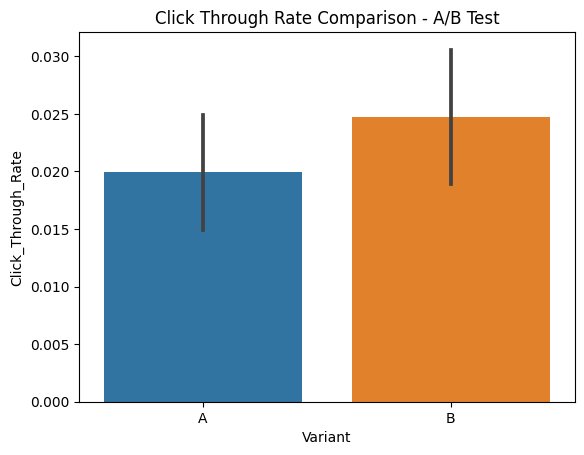

Based on the A/B test, choose Variant B for better Click-Through Rates.


In [7]:
# Apply A/B testing code for Click-Through Rate
t_stat_ctr, p_value_ctr = stats.ttest_ind(ctr_df[ctr_df['Variant'] == 'A']['Click_Through_Rate'],
                                          ctr_df[ctr_df['Variant'] == 'B']['Click_Through_Rate'])

print(f'T-statistic for Click-Through Rate: {t_stat_ctr}')
print(f'P-value for Click-Through Rate: {p_value_ctr}')

# Visualize A/B Test Results for Click-Through Rate
sns.barplot(x='Variant', y='Click_Through_Rate', data=ctr_df, ci='sd')
plt.title('Click Through Rate Comparison - A/B Test')
plt.show()

# Check for significance
# Conclusion for Click-Through Rate
if p_value_ctr < alpha:
    print('Based on the A/B test, choose Variant B for better Click-Through Rates.')
else:
    print('No significant difference found between Variant A and Variant B for Click-Through Rates.')


#2. Conversion Rate Comparison:


T-statistic for Conversion Rate: -20.75801081599543
P-value for Conversion Rate: 7.900588708059329e-87


<ipython-input-8-12f2171d0de3>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Variant', y='Conversion_Rate', data=conversion_rate_df, ci='sd')


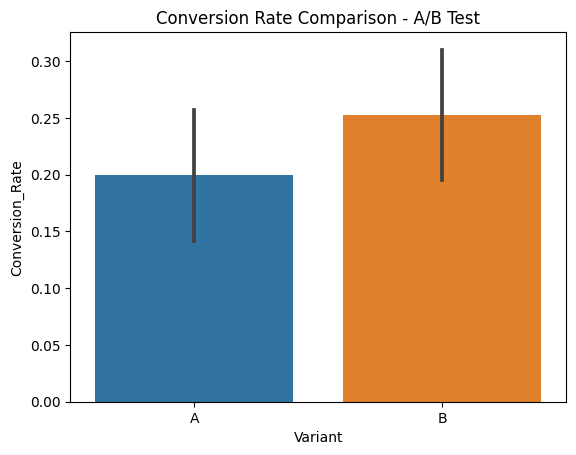

Based on the A/B test, choose Variant B for better Conversion Rates.


In [8]:
# Apply A/B testing code for Conversion Rate
t_stat_conv, p_value_conv = stats.ttest_ind(conversion_rate_df[conversion_rate_df['Variant'] == 'A']['Conversion_Rate'],
                                            conversion_rate_df[conversion_rate_df['Variant'] == 'B']['Conversion_Rate'])

print(f'T-statistic for Conversion Rate: {t_stat_conv}')
print(f'P-value for Conversion Rate: {p_value_conv}')

# Visualize A/B Test Results for Conversion Rate
sns.barplot(x='Variant', y='Conversion_Rate', data=conversion_rate_df, ci='sd')
plt.title('Conversion Rate Comparison - A/B Test')
plt.show()

# Check for significance
# Conclusion for Conversion Rate
if p_value_conv < alpha:
    print('Based on the A/B test, choose Variant B for better Conversion Rates.')
else:
    print('No significant difference found between Variant A and Variant B for Conversion Rates.')


#3. Engagement Time Comparison:

---




T-statistic for Engagement Time: -10.195453955696307
P-value for Engagement Time: 7.87236224009614e-24


<ipython-input-9-f63b3181f054>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Variant', y='Engagement_Time', data=engagement_time_df, ci='sd')


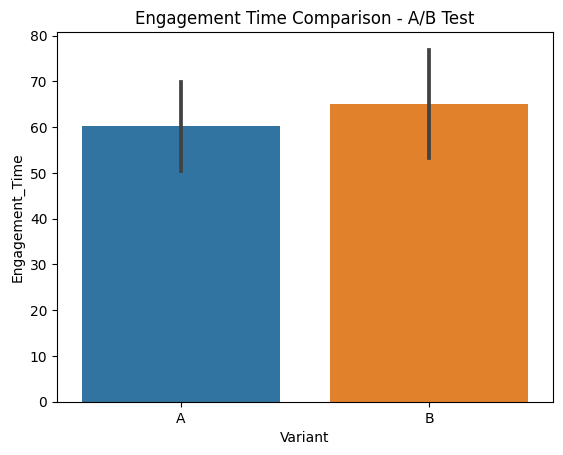

Based on the A/B test, choose Variant B for longer Engagement Time.


In [9]:
# Apply A/B testing code for Engagement Time
t_stat_engagement, p_value_engagement = stats.ttest_ind(engagement_time_df[engagement_time_df['Variant'] == 'A']['Engagement_Time'],
                                                        engagement_time_df[engagement_time_df['Variant'] == 'B']['Engagement_Time'])

print(f'T-statistic for Engagement Time: {t_stat_engagement}')
print(f'P-value for Engagement Time: {p_value_engagement}')

# Visualize A/B Test Results for Engagement Time
sns.barplot(x='Variant', y='Engagement_Time', data=engagement_time_df, ci='sd')
plt.title('Engagement Time Comparison - A/B Test')
plt.show()

# Check for significance
# Conclusion for Engagement Time
if p_value_engagement < alpha:
    print('Based on the A/B test, choose Variant B for longer Engagement Time.')
else:
    print('No significant difference found between Variant A and Variant B for Engagement Time.')


## Code for Download the dataset files if you generate random data.

In [ ]:
from google.colab import files
ctr_df.to_csv('ctr_df.csv')
files.download('ctr_df.csv')

conversion_rate_df.to_csv('conversion_rate_df.csv')
files.download('conversion_rate_df.csv')

engagement_time_df.to_csv('engagement_time_df.csv')
files.download('engagement_time_df.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>